### Clean and Analyze Employee Exit Surveys

#### Introduction
##### Overveiw

The project involved working witn exit surveys from the employees of the Department of Education, Training and Employment and the Technical and Furthe Education institute in Queensiland, Australia.


##### Assumptions

Data is modified to use UTF-8 formatting.

dete_survey.csv:
   - ID: An id used to identify the participant of the survey
   - SeparationType: The reason why the person's employment ended
   - Cease Date: The year or month the person's employment ended
   - DETE Start Date: The year the person began employment with the DETE
     
tafe_survey.csv:
   - Record ID: An id used to identify the participant of the survey
   - Reason for ceasing employment: The reason why the person's employment ended
   - LengthofServiceOverall. Overall Length of Service at
   - Institute (in years): The length of the person's employment (in years)

We will combine the results for both surveys to be able to answer these questions. 


##### Questions

- Are employees who worked for a short time resigning due to some kind of dissatisfaction? What about employees who have worked there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


#### Import, Setting, Load Data
             
       
     

In [158]:
import pandas as pd
import numpy as np

In [159]:
dete = pd.read_csv('datasets/dete_survey.csv')
tafe = pd.read_csv('datasets/tafe_survey.csv') 

#### Exploratory Data Analysis

In [160]:
dete.info()
dete.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [161]:
tafe.info()
tafe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Make the following observations based on the previous step:
   - The dataset dete contains 'Not Stated' values that indicate values are missing (not as NaN)
   - Both datasets contain many columns that we don't need for analysis.
   - Datasets contains many same columns with different names
   - Columns/Answers showing reasons for resignation being dissatisfaction.
   
Next step, we'll correct rhe 'Not Stated' values and drop some of the columns we don't need. 

In [162]:
#read 'Not Stated' as NaN
dete = pd.read_csv('datasets/dete_survey.csv', na_values='Not Stated')
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [163]:
#explore 
dete.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [77]:
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [164]:
#drop
dete_updated=dete.drop(dete.columns[28:49], axis=1)
tafe_updated=tafe.drop(tafe.columns[17:66], axis=1)

#check that the columns were dropped
dete_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [165]:
tafe_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

##### Rename Columns
We'll standardize the name of the columns to combine the dataframes

In [166]:
#clean the columns name
dete_updated.columns = dete_updated.columns.str.lower().str.strip().str.replace(' ', '_')

dete_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [167]:
#update col names to math the names in date
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_updated = tafe_updated.rename(mapping, axis = 1)
tafe_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

##### Filter the Data
We'll analyze survey respondents who resigned. we'll select only separation types containing the string 'Resignation'

In [168]:
#chech the unique values
tafe_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [169]:
#check the unique values
dete_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [176]:
# Update  "resignation" to 'Resignation'
dete_updated['separationtype'] = dete_updated['separationtype'].str.split('-').str[0]

# Check column were updated correctly
dete_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [171]:
# Select only the resignation separation types
dete_resignations = dete_updated[dete_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_updated[tafe_updated['separationtype'] == 'Resignation'].copy()

In [172]:
dete_resignations.head()
#tafe_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


##### Verify the Data
We'll use the following criteria:
   - Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
   - Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [173]:
#check unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [174]:
# Remove slash 
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again 
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [142]:
# convert years to float date type

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [143]:
#clean dete_start_datete
dete_resignations['dete_start_date'].value_counts().sort_values()

1975.0     1
1973.0     1
1971.0     1
1982.0     1
1984.0     1
1977.0     1
1963.0     1
1972.0     1
1987.0     1
1974.0     2
1976.0     2
1983.0     2
2001.0     3
1985.0     3
1986.0     3
1991.0     4
1988.0     4
1989.0     4
1995.0     4
1990.0     5
1993.0     5
1980.0     5
1997.0     5
2002.0     6
1996.0     6
1994.0     6
1992.0     6
1998.0     6
2003.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [144]:
#check date column in tafe
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

<AxesSubplot:>

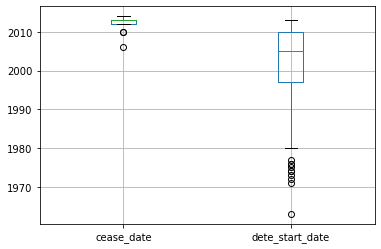

In [145]:
%matplotlib inline

dete_resignations.boxplot(['cease_date', 'dete_start_date'])

- only dete has a start date
- dete cease date contains custom dates. removed all these custom dates and transformed the dates to float.
- No extreme years like 1940 or years beyond the current date.
- all dates uniform. Year only.

##### Create a New column

We need a column containing the lenght of time an employee spent in their workplace. In tafe we detected 'institute_service', dete doesn't include this.


In [214]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_sevise', 'dissatisfied'],
      dtype='object')

In [215]:
# calculate the lenght of time an employee in
dete_resignations['institute_sevise'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_sevise'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_sevise, dtype: float64

##### Identify dessatisfied Emploees
We'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

tafe_survey_updated:
   - Contributing Factors. Dissatisfaction
   - Contributing Factors. Job Dissatisfaction
   
dafe_survey_updated:
   - job_dissatisfaction
   - dissatisfaction_with_the_department
   - physical_work_environment
   - lack_of_recognition
   - lack_of_job_security
   - work_location
   - employment_conditions
   - work_life_balance
   - workload
   
Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.

If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied. To accomplish this, we'll use the DataFrame.any() method to do the following:

- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [216]:
# Check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [217]:
# Check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [218]:
# Update values in tafe with True, False and NaN values
# Add dissatisfied column
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [219]:
# Update the values 
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [226]:
# create copy of results with df.copy() to avoid warning.
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()


##### Combine the Data
We'll add an institute column so that we can differentiate the data from each survey after we combine them. 
Now, we'll combine the dataframes and drop any remaining columns we don't need. Our end goal os to aggregate the data according to the 'institute_service' column.



In [221]:
# column named institute
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'


In [231]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [233]:
combined.head()
combined_updated = combined.dropna(thresh=500, axis = 1)

In [234]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,dissatisfied
0,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,False
1,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,True
2,9.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,False
3,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,True
4,1.200000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,False
...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,False
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,False
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,False
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,False


In [238]:
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
institute_sevise                                       273
dete_start_date                                        283
institute_service                                      290
role_service                                           290
relocation                                             311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             3

In [237]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [236]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,dissatisfied
0,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,False
1,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,True
2,9.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,False
3,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,True
4,1.200000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,False
...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,False
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,False
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,False
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,False


##### Clean the Service Column
We'll clean the institute_service column and categorize employees according to the following definitions:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

Our analysis is based:
- Newbie (3 years or less at the company): These employees are least invested in company culture and the most transient, viewing the risk of switching jobs to be low. The top motivator for 59 percent of those in the newbie career stage is learning new skills or gaining new knowledge. They’re eager to learn through experience over formalized training programs. Employees in the newbie stage are challenged by not meeting personal goals or expectations and prefer managers that will offer guidance and feedback.
- Sophomore (4-7 years at the company): These employees are learning in the moment and focused on proving themselves, but 29 percent also fear getting stuck or not feeling challenged enough. At this career stage, employees pay more attention to ethics, transparency and honest communications, expect more frequent communications from supervisors and place the highest value on work-life balance.
- Tenured (8-10 years at the company): The top motivator for 58 percent of employees in the tenured stage is to contribute to the company’s overall goals. They focus more on what success looks like, are motivated by public recognition and promotion and seek ownership over specific projects or teams. The biggest challenge for the tenured stage is combatting stagnation and feeling “stuck.” It’s important for them to have open, direct conversations with their managers to help look for opportunities to further their career and find ways to overcome any barriers.
- Sage (11 years or more at the company): With 76 percent of employees in the sage stage considering themselves loyal to their organization, they are the most loyal and engaged career stage overall and have one of the highest Net Promoter Scores. They typically fill more senior or leadership positions, which afford them leverage to dictate the ways they are engaged. They are less focused on building social relationships or credibility, as they have already established this, and are apprehensive about “life after work.” Legacy building is a pride-based motivation and is more often manifested in projects over people. Sage employees place the most emphasis on a company’s value and culture and should be increasingly engaged with projects that build a piece of the organization’s future.
Which makes the argument that understanding employee's needs according to career stage instead of age is more effective.